## Chapter 7: Quantum Approximate Optimization Algorithm (QAOA) 

## Maxcut pyQuil Implementation

In [10]:
# Import Libraries and define QVM  Connection
import numpy as np
from grove.pyqaoa.maxcut_qaoa import maxcut_qaoa
import pyquil.api as api
import matplotlib.pyplot as plt
import networkx as nx
qvm_connection = api.QVMConnection()

### Assign network edges. 

In [11]:
# assign network edges
nw_edges=[(0,1),(1,2),(2,3),(3,4),(4,5),(5,6),(7,0),(7,8),(8,9),(9,2),(9,10),(10,11),(11,4),(11,12),(12,6),(0,10),(3,12)]

### Run optimization on QVM

In [12]:
steps = 2
inst = maxcut_qaoa(graph=nw_edges, steps=steps)
betas, gammas = inst.get_angles()

                     models will be ineffective
	Parameters: [1.82113153 1.33738605 4.04846415 3.36494378] 
	E => -6.862911860306613
	Parameters: [1.92357018 1.22872344 4.07256215 3.55422186] 
	E => -7.6438792379061296
	Parameters: [1.74999358 1.28096508 4.23522365 3.69618043] 
	E => -8.626865106985527
	Parameters: [1.74999358 1.28096508 4.23522365 3.69618043] 
	E => -8.48358187726647
	Parameters: [1.81046084 1.18849737 4.37529328 3.60811354] 
	E => -8.813372486540876
	Parameters: [1.85065378 1.14748768 4.44231585 3.81382202] 
	E => -8.58435414186264
	Parameters: [1.85065378 1.14748768 4.44231585 3.81382202] 
	E => -8.580884317066502
	Parameters: [1.85065378 1.14748768 4.44231585 3.81382202] 
	E => -8.820876820989215
	Parameters: [1.85065378 1.14748768 4.44231585 3.81382202] 
	E => -8.898984066957876
	Parameters: [1.85065378 1.14748768 4.44231585 3.81382202] 
	E => -8.901255101530197
	Parameters: [1.82149295 1.2030744  4.41384398 3.65653473] 
	E => -8.941317831140728
	Parameters: [1.81

In [13]:
t = np.hstack((betas, gammas))
param_prog = inst.get_parameterized_program()
prog = param_prog(t)
wf = qvm_connection.wavefunction(prog)
wf = wf.amplitudes
wlist = []
for state_index in range(2**len(inst.qubits)):
    ww = np.conj(wf[state_index])*wf[state_index]
    wlist.append([inst.states[state_index], ww.real])
wlist.sort(key=lambda x: float(x[1]),reverse=True)

### List of partioning solutions with weights

In [14]:
wlist

[['0111011011101', 0.002922556868412158],
 ['1000100100010', 0.002922556868412158],
 ['0000101010010', 0.002922556868412157],
 ['1111010101101', 0.002922556868412157],
 ['0001101011101', 0.0022302766898300587],
 ['1110010100010', 0.0022302766898300587],
 ['0110011010010', 0.002230276689830058],
 ['1001100101101', 0.002230276689830058],
 ['0011100111011', 0.0021702652886540393],
 ['1100011000100', 0.0021702652886540393],
 ['0100010110100', 0.0021702652886540384],
 ['1011101001011', 0.0021702652886540384],
 ['0000010111100', 0.0019965848073406115],
 ['1111101000011', 0.0019965848073406115],
 ['0111100110011', 0.0019965848073406106],
 ['1000011001100', 0.0019965848073406106],
 ['0111101010011', 0.001915498051430842],
 ['1000010101100', 0.001915498051430842],
 ['0000011011100', 0.0019154980514308414],
 ['1111100100011', 0.0019154980514308414],
 ['0110011010001', 0.0018741382737162316],
 ['1001100101110', 0.0018741382737162316],
 ['0001101011110', 0.0018741382737162305],
 ['1110010100001', 

In [15]:
mxcutlist0 = []
mxcutlist1 = []
for i in range(len(wlist[0][0])):
    if wlist[0][0][i] == '0':
        mxcutlist0.append(i)
    else:
        mxcutlist1.append(i)
print("maxcut0 is ",mxcutlist0)
print("maxcut1 is ",mxcutlist1)

maxcut0 is  [0, 4, 7, 11]
maxcut1 is  [1, 2, 3, 5, 6, 8, 9, 10, 12]


### Plot  max cut partioning sets from pyQuil

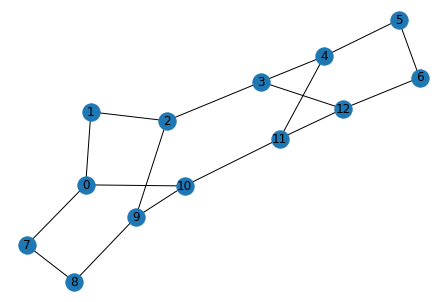

The first set from maxcut partioning is  [0, 4, 7, 11]
The second set from maxcut partioning is  [1, 2, 3, 5, 6, 8, 9, 10, 12]


In [16]:
G1 = nx.Graph()
G1.add_edges_from(nw_edges)
pos = nx.spring_layout(G1)
#gd.draw_custom(G2,pos)
nx.draw(G1,pos,with_labels=True)
plt.show()
print("The first set from maxcut partioning is ",mxcutlist0)
print("The second set from maxcut partioning is ",mxcutlist1)